In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
import nlopt
from statsrat import expr
from statsrat.expr.predef.pvl_time_cue import aab_renewal
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
perform_oat = False
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


AAB renewal (between subjects, time cue) 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_aab_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_aab_r_null.jpeg


0.017397676401589957
       schedule     trial_name u_name  mean_resp
0  experimental  cs -> nothing     us   0.866404
0       control  cs -> nothing     us   0.849007


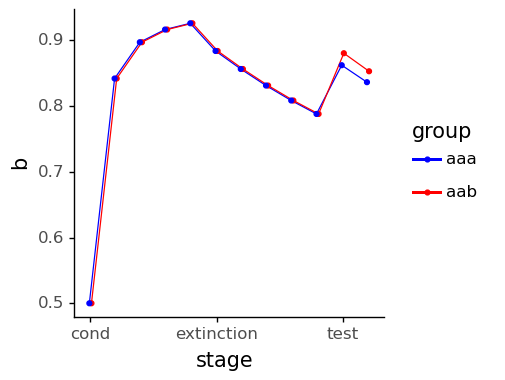

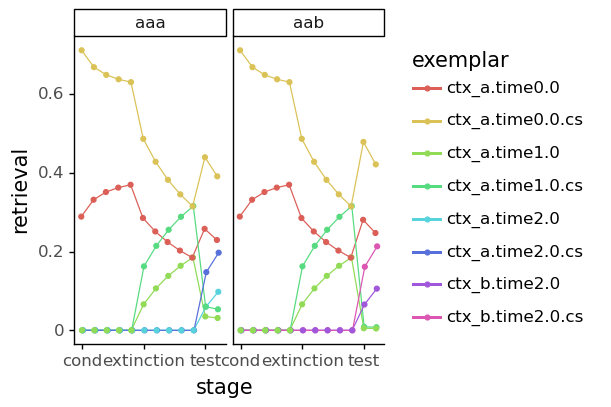

In [3]:
print('AAB renewal (between subjects, time cue) \n')

# Principle: attention to context and time is low except when there is a sudden change.

atn_hi = 1.0

trials = aab_renewal.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = atn_hi
init_atn.loc[['ctx_a.time1.0', 'ctx_a.time1.0.cs'], ['ctx_a', 'time']] = atn_hi
ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = aab_renewal.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs'] = atn_hi
init_atn.loc[['ctx_a.time1.0', 'ctx_a.time1.0.cs'], ['ctx_a', 'time']] = atn_hi
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aab'},
                       only_main = True,
                       draw_points = True)
plot_b += scale_color_manual(values = {'aab': 'red', 'aaa': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_aab_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'rtrv',
                       schedule_facet = True,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       rename_schedules = {'control': 'aaa', 'experimental': 'aab'},
                       only_main = True,
                       draw_points = True)
plot_r += ylab('retrieval')
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_aab_r_' + model.name + '.jpeg', dpi = 500)

print(aab_renewal.oats['renewal'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(aab_renewal.oats['renewal'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

In [4]:
if model.name != 'null':
    if model.name == 'grad_common':
        sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', sel = {'ex_name': ds_exp['ex_name'].values[0]}).draw()
    else:
        sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', facet_var = 'ex_name').draw()

In [5]:
#if perform_oat:
#    oat_result = sr.perform_oat(model = model, experiment = aab_renewal, n = 1, minimize = False)
#    print(np.round(oat_result[0], 4))
#    print(oat_result[1])